In [2]:
#pip install umap-learn tensorflow matplotlib plotly pandas nbformat

In [3]:
import sys
sys.path.append('../..')

In [4]:
import numpy as np
import os
from mini_coil.explore.custom_parametric_umap import ParametricUMAP

# Plot the UMAP
import matplotlib.pyplot as plt


DATA_DIR = os.path.join('..', '..', 'data')

/home/generall/projects/vector_search/miniCOIL/venv-tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-11 15:43:54.314030: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 15:43:54.325168: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-11 15:43:54.403841: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-11 15:43:54.464483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT facto

In [5]:
# Read numpy file as mmap

mmap = np.load(os.path.join(DATA_DIR, 'triplets-8000-mxbai-large-jina-small', 'word-emb-bat.npy'), mmap_mode='r')


In [6]:
mmap.shape

(14947, 512)

In [7]:


# 1. Default 3-layer model
umap_default = ParametricUMAP()
umap_default.fit(mmap)
proj_default = umap_default.transform(mmap)


E0000 00:00:1746971042.843277 1200887 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746971042.849951 1200887 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/generall/projects/vector_search/miniCOIL/venv-tf/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Epoch 1/10


/home/generall/projects/vector_search/miniCOIL/venv-tf/lib/python3.11/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


2130/2130 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.2547
Epoch 2/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2278
Epoch 3/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2235
Epoch 4/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2217
Epoch 5/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2202
Epoch 6/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2197
Epoch 7/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2189
Epoch 8/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2184
Epoch 9/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2181
Epoch 10/10
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2178


In [8]:
from tensorflow import keras
from keras import ops
from tensorflow.keras import layers, Sequential


# Define your custom 1-layer model
def make_one_layer_model(input_dim, output_dim):
    return Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        layers.Dense(4, activation='relu', use_bias=False),
        layers.Dense(16, activation='relu', use_bias=False),
        layers.Dense(output_dim, activation=None, use_bias=False)
    ])

# 2. Custom 1-layer model
umap_one_layer = ParametricUMAP(
    encoder=make_one_layer_model(mmap.shape[1], 2),   # <- provide your model function
    decoder=None                    # <- we can skip decoder if you don't care about inverse mapping
)

umap_one_layer.fit(mmap)
proj_one_layer = umap_one_layer.transform(mmap)

/home/generall/projects/vector_search/miniCOIL/venv-tf/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/home/generall/projects/vector_search/miniCOIL/venv-tf/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Epoch 1/10


/home/generall/projects/vector_search/miniCOIL/venv-tf/lib/python3.11/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2972
Epoch 2/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2495
Epoch 3/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2469
Epoch 4/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2462
Epoch 5/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2455
Epoch 6/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2453
Epoch 7/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2448
Epoch 8/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2443
Epoch 9/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2445
Epoch 10/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2441


In [21]:
len(umap_one_layer.encoder.weights)

3

In [9]:
# Remove outliers from result proj_one_layer and proj_default

proj_one_layer_clean = proj_one_layer[np.abs(proj_one_layer[:,1]) < 30]
#proj_default_clean = proj_default[np.abs(proj_default[:,1]) < 30]


/tmp/ipykernel_272667/1300104232.py:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



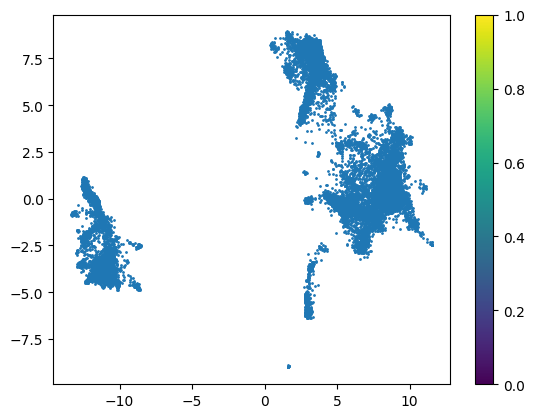

In [19]:


plt.scatter(proj_default_clean[:, 0], proj_default_clean[:, 1], cmap='viridis', s=1)
plt.colorbar()
plt.show()

/tmp/ipykernel_173174/3389529940.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(proj_one_layer_clean[:, 0], proj_one_layer_clean[:, 1], cmap='viridis', s=1)


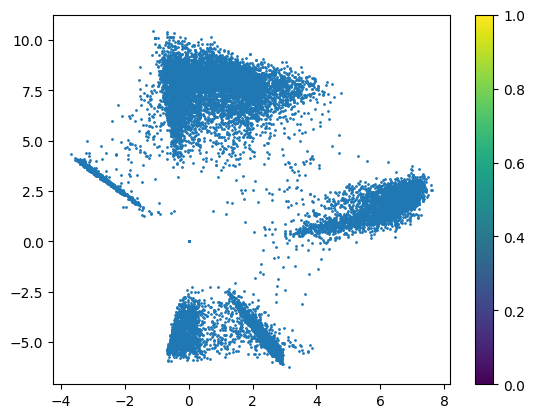

In [13]:
# Plot another UMAP with the custom model
plt.scatter(proj_one_layer_clean[:, 0], proj_one_layer_clean[:, 1], cmap='viridis', s=1)
plt.colorbar()
plt.show()

/tmp/ipykernel_173174/3389529940.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(proj_one_layer_clean[:, 0], proj_one_layer_clean[:, 1], cmap='viridis', s=1)


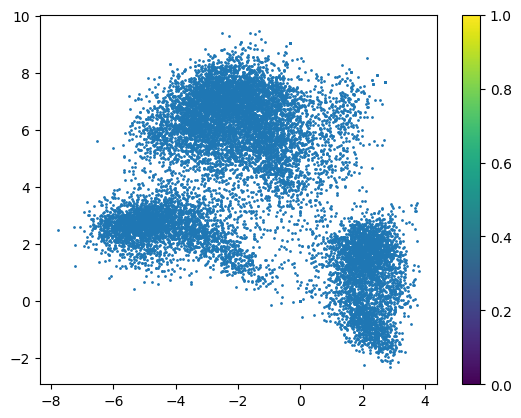

In [10]:
# Plot another UMAP with the custom model
plt.scatter(proj_one_layer_clean[:, 0], proj_one_layer_clean[:, 1], cmap='viridis', s=1)
plt.colorbar()
plt.show()

In [21]:
# Put 3d embeddigns into sphere

norms = np.linalg.norm(proj_one_layer_clean, axis=1)
r = 100

t = np.sqrt(r**2 - norms**2).reshape(-1, 1)

sphere_coords = np.hstack([proj_one_layer_clean, t])



In [15]:
r

100

In [16]:
import plotly.express as px
import pandas as pd

# Create a dataframe with the 3D coordinates
df = pd.DataFrame(sphere_coords, columns=['x', 'y', 'z'])

# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x='x',
    y='y',
    z='z',
    opacity=0.5,
    title='3D Embeddings Visualization'
)

# Update the layout for better visualization
fig.update_traces(marker=dict(size=3))
fig.update_layout(
    scene = dict(
        xaxis_title='X',
        yaxis_title='Y', 
        zaxis_title='Z',
        aspectmode='cube'
    )
)

fig.show()
